## Author:


Zhanhong Kang ： shawnkang0818@gmail.com



### Here is my attempt to crawl the hotel Info of Manhattan from booking.com from May 8th to May 9th.


In [57]:

import requests
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from lxml import html
import time
import pandas as pd
hotel_infos = []
headers ={"User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36",
          "Cookie":"cors_js=1; _gcl_au=1.1.2114662721.1576303140; _ga=GA1.2.1157901468.1576303141; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; cto_lwid=1067ada6-565c-409e-943f-ce87e4b24aa8; bkng_sso_session=e30; __pxvid=1db94dc2-235c-11ea-a3b9-0242ac110003; zz_cook_tms_ed=1; _pxvid=91bc81c6-35aa-11ea-b9ee-0242ac12000a; zz_cook_tms_seg3=8; _scid=28f7b905-6174-4e8a-aa46-be8d2325e413; zz_cook_tms_hlist=191461; 11_srd=%7B%22features%22%3A%5B%7B%22id%22%3A16%2C%22score%22%3A3%2C%22cg%22%3A-1%2C%22name%22%3A%22mousepos%22%7D%2C%7B%22id%22%3A9%7D%5D%2C%22score%22%3A6%2C%22detected%22%3Afalse%7D; clba=1; BJS=-; _gid=GA1.2.141670852.1584664527; has_preloaded=1; _sctr=1|1584676800000; utag_main=v_id:016f02fd22c1000fc667fd8ddb4f03072011606a00bd0$_sn:22$_ss:0$_st:1584680780036$4split:0$4split2:2$_se:4$dc_visit:3$ses_id:1584676482234%3Bexp-session$_pn:12%3Bexp-session; _px3=38f11b476ad4b9bda3d72325ba5fb9dd15eb540538f55b2ba475cdf224c64dd4:J0/BoTYLDvO1J0VYNCbH5NKGhzQTOxkVVum/WgiTcob+F8gQG2p9/FYBoUnPCZPrbfadMR1v5RZn1ZTi4qckww==:1000:jrSC6RD+2Egr6m6ONtPh+xijHhtsqM2jv7s5akHz01+fJPIyb1RKy1osOlrjy8qNzvlLSAqdvrTL0KgWF0Ill8FvjnC80kJts88XYyoUvfF3vO2T/aBAEWcjjGJScoDZ+grQyxMWdaMRplVn8vusjoE0uMs4Sb+yAozdaG5YNro=; _pxde=2eb5523a1995bc14fcaaafd877eb3a234fcadd3fcd5db0e822d6bcd41c70accc:eyJ0aW1lc3RhbXAiOjE1ODQ2Nzk0NjM4ODAsImZfa2IiOjAsImlwY19pZCI6W119; _gat=1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLblDIo%2BpkbYETNYxU7TliFqm2Lf5g3wjrXEEx4mrhvBUD%2FQcrS6Z9x7X8vCgr6reGgzBlieQZXwwsYs%2FyeGUfoEDnyOR3E01%2FPj26aXlvGaa0ukKaOa8TpQiIvNSfMf7s%2Bdu%2FPs%2BBmZXeTxXFAbph2zXfAnL9ga1W%2BkfUqJgACm6OcjNmND0uGAdfAObbniSoC6ubELUlLsPu2MOvUDjIaxiGFgyxaXf2S; lastSeen=0"}
hotel_url = "https://www.booking.com/searchresults.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&sb=1&src=searchresults&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.html%3Faid%3D376370%3Blabel%3Dbdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%253Apl%253Ata%253Ap1%253Ap22%252C575%252C000%253Aac%253Aap%253Aneg%253Afi%253Atiaud-898142578009%253Akwd-334108349%253Alp9004356%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs%3Bsid%3Dc232b1358cf09e067da763a37a3bfe3e%3Btmpl%3Dsearchresults%3Bcheckin_month%3D7%3Bcheckin_monthday%3D1%3Bcheckin_year%3D2020%3Bcheckout_month%3D7%3Bcheckout_monthday%3D2%3Bcheckout_year%3D2020%3Bclass_interval%3D1%3Bdest_id%3D929%3Bdest_type%3Ddistrict%3Bdistrict%3D929%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D2%3Bgroup_children%3D0%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bno_rooms%3D1%3Boffset%3D50%3Bpostcard%3D0%3Braw_dest_type%3Ddistrict%3Broom1%3DA%252CA%3Brows%3D25%3Bsb_price_type%3Dtotal%3Bshw_aparth%3D1%3Bslp_r_match%3D0%3Bsrc%3Dsearchresults%3Bsrc_elem%3Dsb%3Bsrpvid%3Ddb801e3173a8002b%3Bss%3DManhattan%3Bss_all%3D0%3Bssb%3Dempty%3Bsshis%3D0%3Bssne%3DManhattan%3Bssne_untouched%3DManhattan%3Btop_ufis%3D1%26%3B&ss=Manhattan&is_ski_area=0&ssne=Manhattan&ssne_untouched=Manhattan&district=929&checkin_year=2020&checkin_month=5&checkin_monthday=8&checkout_year=2020&checkout_month=5&checkout_monthday=9&group_adults=2&group_children=0&no_rooms=1&from_sf=1"
#r = requests.get(hotel_url,headers)

In [58]:
#request crawler framework
def getHtmlText(url):
    try:
        #headers ={"User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36",
          #"Cookie":"cors_js=1; _gcl_au=1.1.2114662721.1576303140; _ga=GA1.2.1157901468.1576303141; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; cto_lwid=1067ada6-565c-409e-943f-ce87e4b24aa8; bkng_sso_session=e30; __pxvid=1db94dc2-235c-11ea-a3b9-0242ac110003; zz_cook_tms_ed=1; _pxvid=91bc81c6-35aa-11ea-b9ee-0242ac12000a; zz_cook_tms_seg3=8; _scid=28f7b905-6174-4e8a-aa46-be8d2325e413; zz_cook_tms_hlist=191461; 11_srd=%7B%22features%22%3A%5B%7B%22id%22%3A16%2C%22score%22%3A3%2C%22cg%22%3A-1%2C%22name%22%3A%22mousepos%22%7D%2C%7B%22id%22%3A9%7D%5D%2C%22score%22%3A6%2C%22detected%22%3Afalse%7D; clba=1; BJS=-; _gid=GA1.2.141670852.1584664527; has_preloaded=1; _sctr=1|1584676800000; utag_main=v_id:016f02fd22c1000fc667fd8ddb4f03072011606a00bd0$_sn:22$_ss:0$_st:1584680780036$4split:0$4split2:2$_se:4$dc_visit:3$ses_id:1584676482234%3Bexp-session$_pn:12%3Bexp-session; _px3=38f11b476ad4b9bda3d72325ba5fb9dd15eb540538f55b2ba475cdf224c64dd4:J0/BoTYLDvO1J0VYNCbH5NKGhzQTOxkVVum/WgiTcob+F8gQG2p9/FYBoUnPCZPrbfadMR1v5RZn1ZTi4qckww==:1000:jrSC6RD+2Egr6m6ONtPh+xijHhtsqM2jv7s5akHz01+fJPIyb1RKy1osOlrjy8qNzvlLSAqdvrTL0KgWF0Ill8FvjnC80kJts88XYyoUvfF3vO2T/aBAEWcjjGJScoDZ+grQyxMWdaMRplVn8vusjoE0uMs4Sb+yAozdaG5YNro=; _pxde=2eb5523a1995bc14fcaaafd877eb3a234fcadd3fcd5db0e822d6bcd41c70accc:eyJ0aW1lc3RhbXAiOjE1ODQ2Nzk0NjM4ODAsImZfa2IiOjAsImlwY19pZCI6W119; _gat=1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLblDIo%2BpkbYETNYxU7TliFqm2Lf5g3wjrXEEx4mrhvBUD%2FQcrS6Z9x7X8vCgr6reGgzBlieQZXwwsYs%2FyeGUfoEDnyOR3E01%2FPj26aXlvGaa0ukKaOa8TpQiIvNSfMf7s%2Bdu%2FPs%2BBmZXeTxXFAbph2zXfAnL9ga1W%2BkfUqJgACm6OcjNmND0uGAdfAObbniSoC6ubELUlLsPu2MOvUDjIaxiGFgyxaXf2S; lastSeen=0"}
        kv = headers
        r = requests.get(url, headers=kv)
        #r = request.get(url)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "error"

In [54]:
#go to next page
def goNextPage(soup):
    next_page = soup.find('li',attrs={'class':'bui-pagination__item bui-pagination__next-arrow'})
    next_page = next_page.find('a')
    next_page = 'https://www.booking.com'+ next_page.get('href').strip()
    return next_page

    

In [59]:
# get staus code. if it is not 200, 
#it means that it can not be crawled directly by python

r = requests.get(hotel_url)
r.status_code

200

In [60]:
#start getting request
r = getHtmlText(hotel_url)
print(r[0:1000])

<!DOCTYPE html>
<!--
You know you could be getting paid to poke around in our code?
We're hiring designers and developers to work in Amsterdam:
https://careers.booking.com/
-->
<!-- wdot-802 -->
<link href="https://cf.bstatic.com" rel="dns-prefetch" crossorigin>
<link href="https://cf.bstatic.com" rel="dns-prefetch" crossorigin>
<link href="https://shelves.booking.com/" rel="preconnect" crossorigin>
<html lang="en-us" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#" class="noJS b_chrome b_chrome_68 supports_inline-block supports_flexbox_unprefixed supports_fontface " >
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta name="referrer" content="origin-when-cross-origin">
<meta http-equiv="content-type" content="text/html; charset=utf-8" />
<script> function b_cors_check(supported) { var value = supported ? 1 : 0; if (!/(^|;)\s*cors_js=/.test(document.cookie)) { var d = new Date(); d.setTime(d.getTime() + 60 * 60 * 24 * 365 * 

In [14]:
#check source code
print(r[0:1000])

error


In [27]:
#clearly show the html(SOURCE CODE) compare to above
print(html_soup.prettify()[:1000])

<!DOCTYPE html>
<!--
You know you could be getting paid to poke around in our code?
We're hiring designers and developers to work in Amsterdam:
https://careers.booking.com/
-->
<!-- wdot-802 -->
<link crossorigin="" href="https://q-cf.bstatic.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://r-cf.bstatic.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://q-cf.bstatic.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://r-cf.bstatic.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://shelves.booking.com/" rel="preconnect"/>
<html class="noJS b_chrome b_chrome_68 supports_inline-block supports_flexbox_unprefixed supports_fontface" lang="en-us" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#">
 <head profile="http://a9.com/-/spec/opensearch/1.1/">
  <meta content="origin-when-cross-origin" name="referrer"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type">
   <script>
    ;(funct

In [36]:
#test, to make sure that, I am scraping something.
html_soup = BeautifulSoup(r, 'html.parser')
result = html_soup.find_all('div',attrs={'class':'sr_item_content sr_item_content_slider_wrapper'})

#use len to make sure you are getting something.
len(result)

28

In [37]:
#test to get hotel type
#because booking.com provide "Apartment" and "Hotel". 

hotel_t = html_soup.find('span',attrs = {'class':'bui-badge bh-property-type bh-property-type--constructive-dark'})
hotel_t = hotel_t.get_text(strip = True)
#hotel_t = hotel_t.get_text(strip = True) if hotel_t else 'Nan'
#len(hotel_t)
print(hotel_t)


Apartments


In [38]:
#test get next page
next_page = html_soup.find('li',attrs={'class':'bui-pagination__item bui-pagination__next-arrow'})
next_page = next_page.find('a')
next_page = 'https://www.booking.com'+ next_page.get('href').strip()
print(next_page)


https://www.booking.com/searchresults.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&tmpl=searchresults&checkin_month=5&checkin_monthday=8&checkin_year=2020&checkout_month=5&checkout_monthday=9&checkout_year=2020&class_interval=1&dest_id=929&dest_type=district&district=929&from_sf=1&group_adults=2&group_children=0&label_click=undef&no_rooms=1&raw_dest_type=district&room1=A%2CA&sb_price_type=total&shw_aparth=1&slp_r_match=0&src=searchresults&src_elem=sb&srpvid=0ff52744c6af0068&ss=Manhattan&ssb=empty&ssne=Manhattan&ssne_untouched=Manhattan&top_ufis=1&rows=25&offset=100


In [39]:
#clear up the data in order to test the program many times.
hotel_infos.clear()
hotel_info_info.clear()

In [40]:
#Flip page, in this case I put 2 in range.
#means that I am going to scrape 2 pages.
for i in range(2):
    r = getHtmlText(hotel_url)
    html_soup = BeautifulSoup(r, 'html.parser')
    result = html_soup.find_all('div',attrs={'class':'sr_item_content sr_item_content_slider_wrapper'})
    
    #start Scraping the data
    for i in result:
        #Crawl hotel links
        link = i.find('a',attrs={'class':'hotel_name_link url'})
        hotel_link = 'https://www.booking.com'+ str(link.get('href').strip())

        #Crawl hotel prices,In this case, the lowest price is automatically selected
        hotel_price = i.find('div',attrs={'class':'bui-price-display__value prco-inline-block-maker-helper'})
        hotel_price = hotel_price.get_text(strip = True) if hotel_price else "Not avaliable"
        
        #Crawl hotel Name
        hotel_name = i.find('span',attrs = {'class':'sr-hotel__name'}).text.strip()

        #Crawl hotel review score
        hotel_score = i.find('div', attrs = {'class':'bui-review-score__badge'})
        hotel_score = hotel_score.get_text(strip = True) if hotel_score else "Nan"
        
        #figure it out it's Hotel or Apartment
        #hotel_type = i.find('div',attrs = {'class':'bui-u-inline'})
        hotel_type =i.find('span',attrs = {'class':'bui-badge bh-property-type bh-property-type--constructive-dark'})
        hotel_type = hotel_type.get_text(strip = True) if hotel_type else "Hotel"
        
        #Json Method to save data
        #hotel_infos.append({
        #    "hotel_link" : hotel_link,
        #    "hotel_price" : hotel_price,
        #    "hotel_name"  : hotel_name,
        #    "hotel_score" : hotel_score,
        #    "hotel_type" : hotel_type})
        
        hotel_info_info = []
        hotel_info_info.append(hotel_price)
        hotel_info_info.append(hotel_name)
        hotel_info_info.append(hotel_link)
        hotel_info_info.append(hotel_score)
        hotel_info_info.append(hotel_type)
        hotel_infos.append(hotel_info_info)
        hotel_url = goNextPage(html_soup)

#print last part of data of a page, make sure I'm getting in the right page.     
print(hotel_info_info[0:3])


['$149', 'Hilton Garden Inn New York Manhattan Midtown East', 'https://www.booking.com/hotel/us/hilton-garden-inn-new-york-manhattan-east.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=90547301_93771946_2_2_0&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=52&highlighted_blocks=90547301_93771946_2_2_0&hpos=27&no_rooms=1&sr_order=popularity&sr_pri_blocks=90547301_93771946_2_2_0__14900&srepoch=1588829924&srpvid=c47327b1ce960052&ucfs=1&from=searchresults\n;highlight_room=#hotelTmpl']


In [815]:
#if i use Json to save data in dict.
#for hotel_info in hotel_infos:
#    print(hotel_info)

In [41]:
#easy clean data
#write to CSV file and drop duplicates by the way.
name = ["Price","Name","Link","Score","Type"]
hotel_data = pd.DataFrame(columns=name,data=hotel_infos)

# drop duplicates data, before write to a CSV file
hotel_data = hotel_data.drop_duplicates(['Name'])
hotel_data.to_csv("C:/Users/520ka/Desktop/Hotel.csv")

In [42]:
#show first 60 data not include the duplicates
hotel_data.head(60)

,Price,Name,Link,Score,Type
0,Not avaliable,Holiday Inn Manhattan Financial District,https://www.booking.com/hotel/us/holiday-inn-f...,8.2,Hotel
1,$95,The Manhattan Club,https://www.booking.com/hotel/us/the-manhattan...,8.4,Hotel
2,$135,Hyatt Place New York City/Times Square,https://www.booking.com/hotel/us/hyatt-place-n...,8.4,Hotel
3,$99,Element Times Square West,https://www.booking.com/hotel/us/element-times...,8.3,Hotel
4,$119,DoubleTree by Hilton - Chelsea,https://www.booking.com/hotel/us/doubletree-ne...,7.7,Hotel
5,$95,The Gallivant Times Square,https://www.booking.com/hotel/us/tryp-by-wyndh...,7.2,Hotel
6,Not avaliable,Hotel Pennsylvania,https://www.booking.com/hotel/us/pennsylvania-...,5.7,Hotel
7,$150,San Carlos Hotel New York,https://www.booking.com/hotel/us/san-carlos-ho...,8.9,Hotel
8,$114,"The New Yorker, A Wyndham Hotel",https://www.booking.com/hotel/us/new-yorker-ra...,7.9,Hotel
9,$191,Millennium Premier New York Times Square,https://www.booking.com/hotel/us/the-premier-n...,8.0,Hotel


In [43]:
#check if duplicate by 'Name' colmn(a specific colnm)
#True means duplicate. Fales means not duplicate
hotel_data.duplicated(['Name'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
31    False
38    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
dtype: bool

### Discretization and Binning¶

In [1084]:
bins=[6.0,7.0,8.0,9.0,10.0]
score=[]
for i in test['Score']:
    score.append(float(i))

see_score = pd.cut(score,bins)


In [1085]:
#see overall hotel score level
pd.value_counts(see_score) 

(8.0, 9.0]     30
(7.0, 8.0]     19
(9.0, 10.0]     4
(6.0, 7.0]      2
dtype: int64

In [19]:
#Reading Data in Text Format
!type Hotel.csv

,Price,Name,Link,Score,Type
0,$84,Holiday Inn Manhattan Financial District,"https://www.booking.com/hotel/us/holiday-inn-financial-district.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=60688703_251336364_0_2_0&checkin=2020-07-01&checkout=2020-07-02&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=1&highlighted_blocks=60688703_251336364_0_2_0&hpos=1&no_rooms=1&sr_order=popularity&sr_pri_blocks=60688703_251336364_0_2_0__8415&srepoch=1588467043&srpvid=71d605f163d4005c&ucfs=1&from=searchresults
;highlight_room=#hotelTmpl",8.2,Hotel
1,$72,Hotel Pennsylvania,"https://www.booking.com/hotel/us/pennsylvania-new-york.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiau

In [47]:
#clealy check if there is NaN element
result = pd.read_csv('Hotel.csv')
pd.isnull(result)

,Unnamed: 0,Price,Name,Link,Score,Type
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [48]:
#only shows the colmn that are selected
result[['Name','Score','Type']]

,Name,Score,Type
0,Holiday Inn Manhattan Financial District,8.2,Hotel
1,The Manhattan Club,8.4,Hotel
2,Hyatt Place New York City/Times Square,8.4,Hotel
3,Element Times Square West,8.3,Hotel
4,DoubleTree by Hilton - Chelsea,7.7,Hotel
5,The Gallivant Times Square,7.2,Hotel
6,Hotel Pennsylvania,5.7,Hotel
7,San Carlos Hotel New York,8.9,Hotel
8,"The New Yorker, A Wyndham Hotel",7.9,Hotel
9,Millennium Premier New York Times Square,8.0,Hotel


In [49]:
#make the pandas display settings more compact
#and change the title/column display order
change_order = pd.read_csv('Hotel.csv',
                    index_col=['Name','Price','Score','Type','Link'])
pd.options.display.max_rows = 47
change_order

,,,,,Unnamed: 0
Name,Price,Score,Type,Link,
Holiday Inn Manhattan Financial District,Not avaliable,8.2,Hotel,https://www.booking.com/hotel/us/holiday-inn-financial-district.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=1&hpos=1&no_rooms=1&soh=1&sr_order=popularity&srepoch=1588829914&srpvid=8c2227ac5c940113&ucfs=1&from=searchresults\n;highlight_room=#no_availability_msg,0
The Manhattan Club,$95,8.4,Hotel,https://www.booking.com/hotel/us/the-manhattan-club.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=24169901_221614299_2_2_0&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=2&highlighted_blocks=24169901_221614299_2_2_0&hpos=2&no_rooms=1&sr_order=popularity&sr_pri_blocks=24169901_221614299_2_2_0__9461&srepoch=1588829914&srpvid=8c2227ac5c940113&ucfs=1&from=searchresults\n;highlight_room=;has_campaign_deals_breakaway20_customer_label=1#hotelTmpl,1
Hyatt Place New York City/Times Square,$135,8.4,Hotel,https://www.booking.com/hotel/us/hyatt-place-new-york-city-times-square.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=521860001_258633516_2_1_0&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=3&highlighted_blocks=521860001_258633516_2_1_0&hpos=3&no_rooms=1&sr_order=popularity&sr_pri_blocks=521860001_258633516_2_1_0__13515&srepoch=1588829914&srpvid=8c2227ac5c940113&ucfs=1&from=searchresults\n;highlight_room=#hotelTmpl,2
Element Times Square West,$99,8.3,Hotel,https://www.booking.com/hotel/us/element-times-square.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=25731318_246425073_0_1_0&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=4&highlighted_blocks=25731318_246425073_0_1_0&hpos=4&no_rooms=1&sr_order=popularity&sr_pri_blocks=25731318_246425073_0_1_0__9900&srepoch=1588829914&srpvid=8c2227ac5c940113&ucfs=1&from=searchresults\n;highlight_room=#hotelTmpl,3
DoubleTree by Hilton - Chelsea,$119,7.7,Hotel,https://www.booking.com/hotel/us/doubletree-new-york-city-chelsea.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-898142578009%3Akwd-334108349%3Alp9004356%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YYnX0UuDUyu9mv9awMvJcBs&sid=c232b1358cf09e067da763a37a3bfe3e&all_sr_blocks=18408503_246033236_2_2_0&checkin=2020-05-08&checkout=2020-05-09&dest_id=929&dest_type=district&group_adults=2&group_children=0&hapos=5&highlighted_blocks=18408503_246033236_2_2_0&hpos=5&no_rooms=1&sr_order=popularity&sr_pri_blocks=18408503_246033236_2_2_0__11900&srepoch=1588829914&srpvid=8c2227ac5c940113&ucfs=1&from=searchresults\n;highlight_room=#hotelTmpl,4
The Gallivant Times Square,$95,7.2,Hotel,https://www.booking.com/hotel/us/tryp-by-wyndham-times-square.html?aid=376370&label=bdot-YLKLehG9gYGiZhzjWOm8iwS413942642287%3Apl%3Ata%3Ap1%3Ap22%2C575%2C000%3Aac%3Aap%3Aneg%3Afi%3Atiaud-8

In [50]:
#to find the mean and highest level between Apartments and Hotel
hotel_type_reivew = result['Score'].groupby(result['Type'])
hotel_type_reivew


In [51]:
#show the mean score of Apartments, condo Hotel and Hotel.
hotel_type_reivew.mean()

Type
Apartments     6.200000
Condo Hotel    9.000000
Hotel          8.107692
Name: Score, dtype: float64

In [52]:
#show the top score in each hotel type
hotel_type_reivew.max()

Type
Apartments     6.7
Condo Hotel    9.2
Hotel          9.1
Name: Score, dtype: float64

In [54]:
#Show hotel information with a specific score
pieces = dict(list(result.groupby('Score')))
pieces[9.2]

,Unnamed: 0,Price,Name,Link,Score,Type
36,47,$199,LYRIC | 70 Pine NYC,https://www.booking.com/hotel/us/q-amp-a-a-res...,9.2,Condo Hotel


In [55]:
#shows the info of the best score of Hotel
pieces = dict(list(result.groupby('Score')))
pieces[9.1]

,Unnamed: 0,Price,Name,Link,Score,Type
29,40,$482,"The Langham, New York, Fifth Avenue",https://www.booking.com/hotel/us/langham-new-y...,9.1,Hotel


In [56]:
#show the total amount of Hotel and Apartment that i selected
result.groupby(['Type']).size()

Type
Apartments      2
Condo Hotel     2
Hotel          39
dtype: int64

## Plotting and Visualization

In [58]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [59]:
p = pd.crosstab(result['Type'],result['Score'])
p

Score,5.7,6.2,6.3,6.7,7.2,7.3,7.4,7.7,7.8,7.9,...,8.2,8.3,8.4,8.5,8.6,8.8,8.9,9.0,9.1,9.2
Type,,,,,,,,,,,,,,,,,,,,,
Apartments,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Condo Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Hotel,1,1,1,0,1,1,1,1,1,2,...,6,4,6,3,1,0,4,1,1,0


In [60]:
#find the score start from at least 6
p=p.loc[:,6:10.]

In [61]:
p=p.div(p.sum(1),axis=0)
p

Score,6.2,6.3,6.7,7.2,7.3,7.4,7.7,7.8,7.9,8.0,...,8.2,8.3,8.4,8.5,8.6,8.8,8.9,9.0,9.1,9.2
Type,,,,,,,,,,,,,,,,,,,,,
Apartments,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Condo Hotel,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.5
Hotel,0.026316,0.026316,0.0,0.026316,0.026316,0.026316,0.026316,0.026316,0.052632,0.026316,...,0.157895,0.105263,0.157895,0.078947,0.026316,0.0,0.105263,0.026316,0.026316,0.0


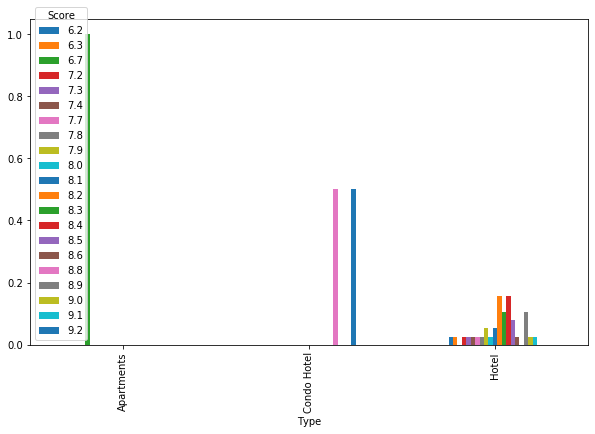

In [62]:
#nice try, just try, nothing i can plot

p.plot.bar()